In [1]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, io, color, util, filters
from skimage.morphology import watershed

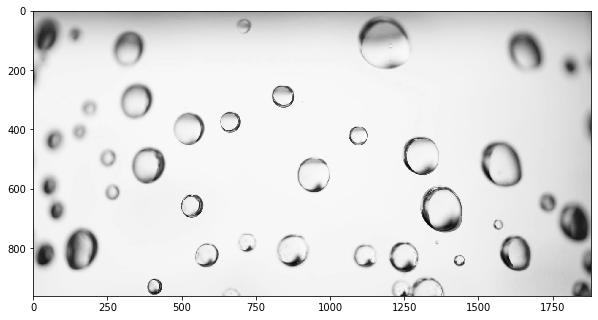

In [2]:
bubbles = color.rgb2gray(io.imread('images/bubbles.jpeg'))

plt.figure(figsize=(10,10))
plt.imshow(bubbles, cmap='gray')

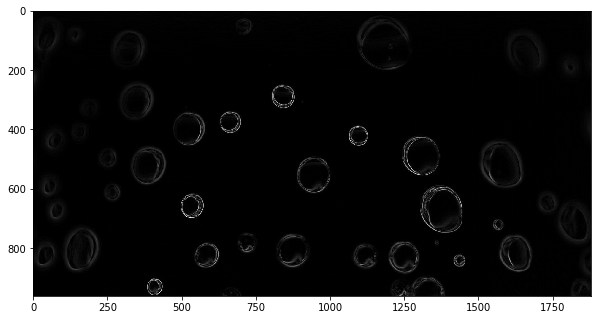

In [4]:
bubbles_edges = filters.sobel(bubbles)

plt.figure(figsize=(10,10))
plt.imshow(bubbles_edges, cmap='gray')

In [5]:
grid = util.regular_grid(bubbles.shape, n_points=300)

grid

(slice(38, None, 78), slice(38, None, 78))

In [7]:
seeds = np.zeros(bubbles.shape, dtype=int)

seeds[grid] = np.arange(seeds[grid].size).reshape(seeds[grid].shape) +1

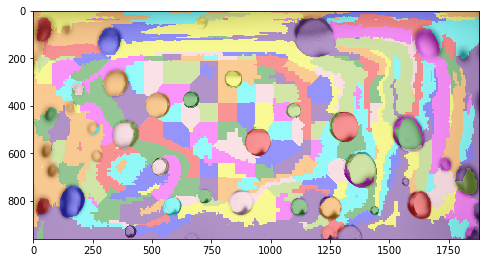

In [8]:
w0 = watershed(bubbles_edges, seeds)

water_classic = color.label2rgb(w0, bubbles, alpha=0.4, kind='overlay')

plt.figure(figsize=(8,8))
plt.imshow(water_classic)

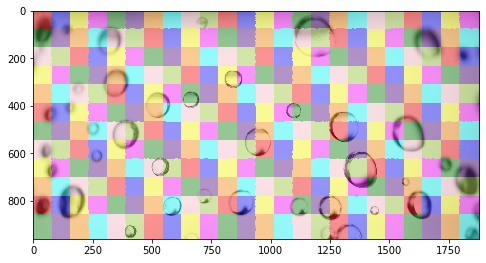

In [10]:
# give even segments
w1 = watershed(bubbles_edges, seeds, compactness=0.91)

water_compact = color.label2rgb(w1, bubbles, alpha=0.4, kind='overlay')

plt.figure(figsize=(8,8))
plt.imshow(water_compact)